## Table of contents
**1. What is time series analysis ?**

**2. How many types of TSA ?**

**3. What are the components of TSA ?**

**4. What are the measurement to identify the accuracy/error ?**

**5. What are the models used to build TSA ?**

**6. ACF - Auto Correlations Function ?**

**7. PACF - Partial Auto-correlations function ?**

**8. ADF-Test - Augumented Dickey Fuller Test (Hypothesis Testing) ?**

**1. What is time series analysis ?**

Ans. Time series is a series of observation taken at a specified tiem intervals usually
    equal intervals. Analysis of the series helps us to predict future value
    based on previous observed value. In time series, we have only 2 variables,
    time and the variable we want to forcast.
    

**2. Why and where Time Series is used ?**

Ans. Time Series data can be analysed in order to extract meaningful 
    statistics and other charecteristics. It's used in atleast 
    the 4 scenarios :
        a) Business Forecasting
        b) Understand Past Behavior
        c) plan the future
        d) Evaluate current accomplishment
        
        
**3. What are the Components of Time Series ?**

Ans. there are 4 components we have :
    a) Trend - long term (upward and downward movement of the data with time over a large perioe of time) 
    b) Seasonality - short term - seasonal variance - 
        - upward or downward swings
        - repeating pattern within a fixed time period
        - usually observed within one year
    c) Cyclicity / cyclic patterns - same like seasonaliy but harder to predict
        - usually go over more than a year of time
        - don't have fixed period
    d) Noisy or Irregularity - short duration and nonrepeating 
        - erratic, unsymmetrical , unsystematic, residual fluctuation
        - presence of white noise data
        - due to random variation or unforseen event

        
**4. when shouldn't we use Time Series Analysis ?**
Ans - we don't need to apply TSA in atleast the following 2 cases - 
    1) y = f(x)=4, when dependant variable is constant 
    2) the dependant variable (y) represent values that can be denoted as a 
        mathematical function. eg. - sin(x), log(x), polynomial etc. 
        No need to to forecasting 
        
**5. How many types of TSF ?**
Ans. There are basically two types of TSA we have :
    1) Additive Model
    Yt = Tt + St + Ct + It
    
    2) Multiplicative Model
    Yt = Tt * St * Ct * It
    
**6. Measurement of Error ?**
Ans. 1) MAE - Mean Absolute Error
     2) MAPE - Mean Absolute Percent Error    
     3) MSE - Mean Square Error
     4) RMSE - Root Mean Square Error
     5) AIC - Akike Information Criterian
        * -2LL + 2K
        Where LL = Log Likelihood
        K = no. of parameter
        parameter = pdq
        p = AR
        q = MA
        d = Intigrated / difference value
     6) BIC - Bayesian Information Criterian
        * -2LL + K*Ln(n)
        where LL - Log Likelihood
        K - No of parameter
        Ln - Natural log
        n - no of observation    

### Different Classical Time Series Forecasting Methods :

**1. Winters Model (Single Exponential Smoothing - ES)

**2. Holt Model (Double Exponential Smoothing)

**3. Holt Winter's Model (Triple/multiple exponential smoothing)

**4. AR Model - AutoRegressive Model

**5. MA Model - Moving Average Model

**6. ARMA - Autoregressive moving average model

**7. ARIMA - Auto Regressive Integrated Moving Average Model ************

**8. ARIMAX - Auto Regressive Integrated Moving Average with external factors

**9. SARIMA - Seasonal Auto Regressive Integrated Moving Average

**10. SARIMAX - Seasonal Auto Regressive Integrated Moving Average WITH EXOGENOUS REGRESSOR

**11. VAR - Vector AutoRegressive

**12. VARMA - Vector AutoRegressive Moving Average

**13. VARMAX - Vector AutoRegressive Moving Average with Exogenous Regression

**14. And so on..........

One of the best model in TSA :


**7. ARIMA - Auto Regressive Integrated Moving Average Model *****


## Real Time Case Study with Time Series Analysis/Forecasting 

# STEP 1 : Import library and dataset

In [1]:
import os
os.chdir("D:\KKK\DSP\Python\Sample data")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("airline_passengers.csv")
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
dataset.set_index(['Month'])

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


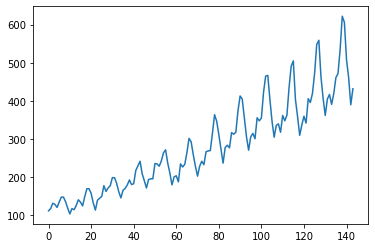

In [6]:
plt.plot(dataset['Thousands of Passengers'])

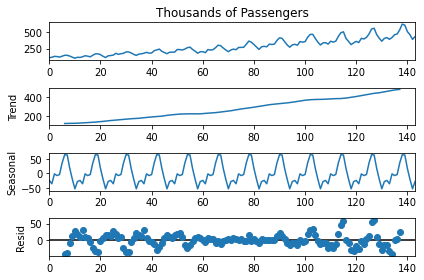

In [7]:
# Decomposition to check dataset component

from statsmodels.tsa.seasonal import seasonal_decompose
# decompose means we wanted to see the all three components
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], period = 12)
decomposition.plot() # period = 12
plt.show()


In [8]:
# Augumented Dickey Fuller Test - ADF Test
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(dataset['Thousands of Passengers'])

(0.815368879206053,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [10]:
def aug_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ["ADF Stats Test",'P-value','#Lag value','No of Observation']
    
    for value, label in zip(result, labels):
        print(label + " : "+ str(value))
    if result[1]<=0.05:
        print("Strong evidence against Null Hypothesis and my timeseries is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my timeseries is non-stationary")
    

In [11]:
aug_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Stats Test : 0.815368879206053
P-value : 0.9918802434376411
#Lag value : 13
No of Observation : 130
Weak Evidence against null hypothesis and my timeseries is non-stationary


In [12]:
dataset['Thousands of Passengers 1st Diff'] = dataset['Thousands of Passengers'] 
        - dataset['Thousands of Passengers'].shift(1)

IndentationError: unexpected indent (<ipython-input-12-0e4011625d51>, line 2)

In [13]:
dataset.head(20)

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [14]:
aug_check(dataset['Thousands of Passengers 1st Diff'].dropna())

KeyError: 'Thousands of Passengers 1st Diff'

In [15]:
dataset['Thousands of Passengers 2nd Diff'] = 
dataset['Thousands of Passengers 1st Diff'] 
- dataset['Thousands of Passengers 1st Diff'].shift(1)

SyntaxError: invalid syntax (<ipython-input-15-9edca64cae84>, line 1)

In [16]:
dataset.head(10)

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [17]:
aug_check(dataset['Thousands of Passengers 2nd Diff'].dropna())

KeyError: 'Thousands of Passengers 2nd Diff'

In [18]:
# Trend
    # p = ?
    # d = 2
    # q = ?
    
# Seasonality 
    # P = ?
    # D = ?
    # Q = ?
    

In [19]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] 
- dataset['Thousands of Passengers'].shift(12)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
139   -559.0
140   -463.0
141   -407.0
142   -362.0
143   -405.0
Name: Thousands of Passengers, Length: 144, dtype: float64

In [20]:
dataset.head(25)

,Month,Thousands of Passengers,Seasonality
0,1949-01-01,112,112
1,1949-02-01,118,118
2,1949-03-01,132,132
3,1949-04-01,129,129
4,1949-05-01,121,121
5,1949-06-01,135,135
6,1949-07-01,148,148
7,1949-08-01,148,148
8,1949-09-01,136,136
9,1949-10-01,119,119


In [21]:
aug_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test
ADF Stats Test : 0.815368879206053
P-value : 0.9918802434376411
#Lag value : 13
No of Observation : 130
Weak Evidence against null hypothesis and my timeseries is non-stationary


In [ ]:
# Trend
    # p = ?
    # d = 2
    # q = ?
    
# Seasonality 
    # P = ?
    # D = 1
    # Q = ?

In [22]:
os.getcwd()

'D:\\KKK\\DSP\\Python\\Sample data'

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
dataset = pd.read_csv("airline_passengers.csv")

In [25]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
#YYYY-MM-DD


In [27]:
## Project - Airline_Passengers

import os
os.chdir("D:\KKK\DSP\Python\Sample data")

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [30]:
# Basic package requried to install in your notebook
from numpy import log
from pandas import Series
from statsmodels.tsa.stattools import adfuller ## this is for stationary dataset
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA # this is the main package or model we have 
from statsmodels.tsa.stattools import acf, pacf

# What is ARIMA Model ?***
Ans - ARIMA (AutoRegressive Integrated Moving Average) is a combination of 2 models
    AR (AutoRegressive) and MA (Moving Average). it has 3 hyperparameter -
    ** p - trend and P - seasonality
    ** d - trend and D - seasonality
    ** q - trend and Q - seasonality
** p - trend and P - seasonality  : is used by AR/plot_pacf model

** q - trend and Q - seasonality : is used by MA/plot_acf Model

** d - trend and D - seasonality : is used by Integrated method / lag approach /
    - to check time series is stationary or not

    ** AR part : correlation between previous and current time period
    
    ** MA Part : is used to smooth out the noise / white noise / irregular data
    
    ** I part : is used for binds together the AR and MA part
        
** P / p : Auto Regressive lags

** Q / q : Moving average 

** D / d : Order of differentiation
        

In [31]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
# Relation between time and target variable, hence setting time as an index variable


In [36]:
dataset.set_index('Month', inplace = True)
# changing any data into index, use set_index function

KeyError: "None of ['Month'] are in the columns"

In [37]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

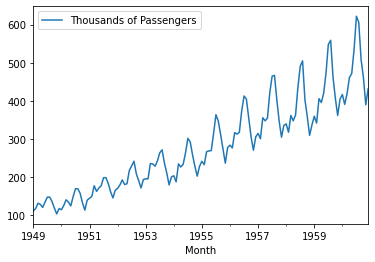

In [38]:
dataset.plot()

<ipython-input-39-84b32f0ec62a>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(dataset['Thousands of Passengers'],


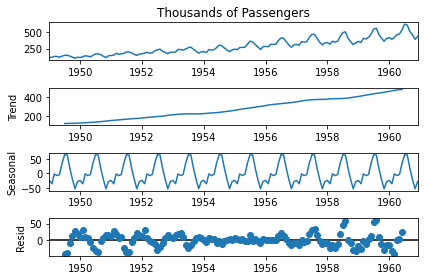

In [39]:
# Decomposition to check dataset component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], 
                                   freq = 12)
decomposition.plot()
plt.show()

**1. What is Stationarity ?**

Ans. - Before applying timeseries or statistical model on TimeSeries,
    the series has to be stationary, which means that, over different time period
    
    1) it should have constant mean
    
    2) it should have costant variance or Standard deviation
    
    3) Auto-covariance should not depend on time    
    
    **4) p-value should be equal to or less than 0.05 (alternative hypothesis testing)
    


In [40]:
# Augumented Dickey Fuller Test - ADF Test
from statsmodels.tsa.stattools import adfuller

In [41]:
adfuller(dataset['Thousands of Passengers'])

(0.815368879206053,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [42]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '#Lags','No of Obs']
    for value, label in zip(result,labels):
        print(label + " : "+ str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis and my time series is stationary")
    else:
        print("Weak evidence against null hypothesis and my time series is non stationary")
        

In [43]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic : 0.815368879206053
p-value : 0.9918802434376411
#Lags : 13
No of Obs : 130
Weak evidence against null hypothesis and my time series is non stationary


In [44]:
# Hypothesis Testing :
- IDV statically significant with DV or not .
- there are 2 parts
-1) Null hypothesis (H0) - IDV does not influence DV
-2) Alternative Hypothesis (Ha) - IDV does influence DV
-3) Build confidence level
    - 95% (industry practice) , 99% , 99.9% , 80%
-4) draw p-value / alpha value with comparing confidence level
    - CL - 95%, P-value - 0.05
    - 99 % - 0.01
    - 97% - 0.03
    - 99.9 % - 0.001
- Anything which is less than 0.05 (p-value) - is known as alternative hypothies tesing
- anything above the 0.05, known as null hypothesis


SyntaxError: invalid syntax (<ipython-input-44-a49a2af7c8b2>, line 2)

In [45]:
# using lag function/approach to convert your data into stationary

In [46]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
dataset['Thousands of Passengers First Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)

In [48]:
dataset.head()

,Thousands of Passengers,Thousands of Passengers First Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [49]:
adf_check(dataset['Thousands of Passengers First Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic : -2.829266824169997
p-value : 0.05421329028382577
#Lags : 12
No of Obs : 130
Weak evidence against null hypothesis and my time series is non stationary


In [50]:
dataset['Thousands of Passengers second Diff'] = dataset['Thousands of Passengers First Diff'] - dataset['Thousands of Passengers First Diff'].shift(1)

In [51]:
dataset.head(10)

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [52]:
adf_check(dataset['Thousands of Passengers second Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic : -16.384231542468477
p-value : 2.732891850014397e-29
#Lags : 11
No of Obs : 130
Strong evidence against null hypothesis and my time series is stationary


In [53]:
# To find d value
d (trend) = 2
p = ?
q = ?

# How to find value p and q for ARIMA ?
Ans - ACF and PACF graph will find the p and q value
 - P gets by PACF 
 - q gets by ACF

# AR : Yt = alpha1*Yt-1+alpha2*Yt-2+......+error
# MA : Yt = beta1*et-1+beta2*et-2+.....+error+mu (average of my time series)

# Trend : AR(p) I(d) MA(q)
#Seasonality : AR(P) I (D) MA(Q)

SyntaxError: invalid syntax (<ipython-input-53-9a5fc129338a>, line 3)

In [54]:
dataset['Seasonal Difference'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [55]:
dataset

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [56]:
adf_check(dataset['Seasonal Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No of Obs : 130
Strong evidence against null hypothesis and my time series is stationary


In [57]:
# d = 2
# D = 1
# p = ?
# P = ?
# q = ?
# Q =?

# acf and pacf graph

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

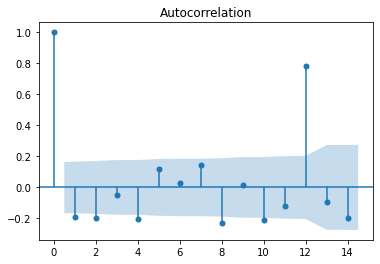

In [61]:
plot_acf(dataset['Thousands of Passengers second Diff'].dropna(), lags=14)
plt.show()

In [62]:
# d = 2
# D = 1
# q = 2
# Q = 5
# p = 2
# P = 2



In [63]:
plot_acf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

KeyError: 'Seasonality'

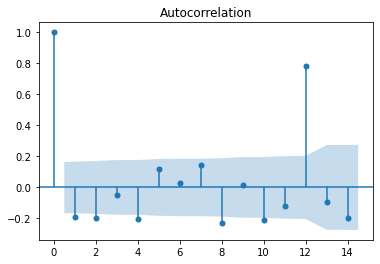

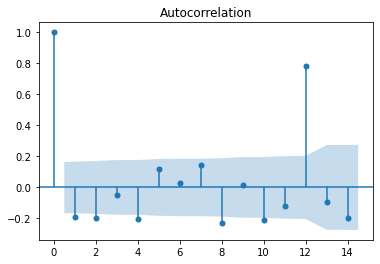

In [64]:
plot_acf(dataset['Thousands of Passengers second Diff'].dropna(), lags=14)

C:\Users\kanna\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


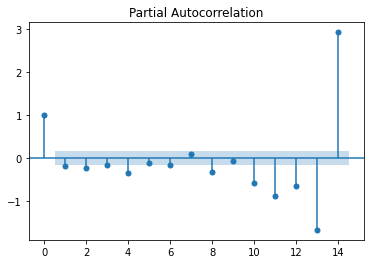

In [67]:
plot_pacf(dataset['Thousands of Passengers second Diff'].dropna(), lags=14)
plt.show()

In [68]:
plot_pacf(dataset['Seasonality'].dropna(), lags=12)
plt.show()

KeyError: 'Seasonality'

In [ ]:
# d = 2
# D = 1
# q = 2

C:\Users\Kumar Sundram\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


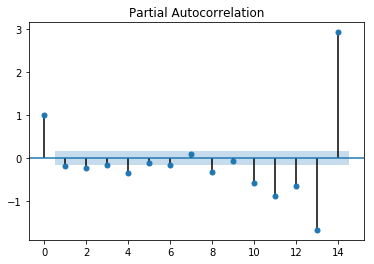

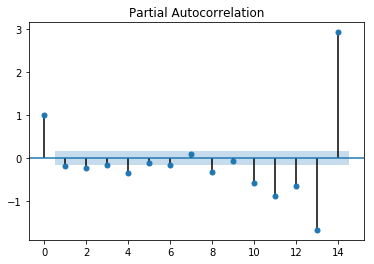

In [32]:
plot_pacf(dataset['Thousands of Passengers second Diff'].dropna(), lags=14)

In [ ]:
# d = 2
# D = 1
# q = 2
# p = 0 -2


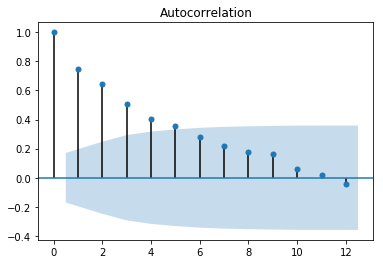

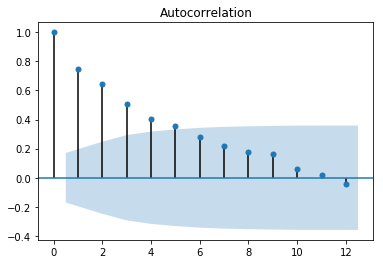

In [33]:
plot_acf(dataset['Seasonal Difference'].dropna(), lags=12)

In [ ]:
# d = 2
# D = 1
# q = 2
# p = 0 
# Q = 5
# P = 2

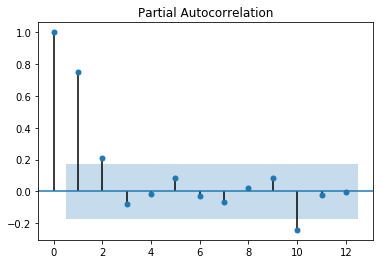

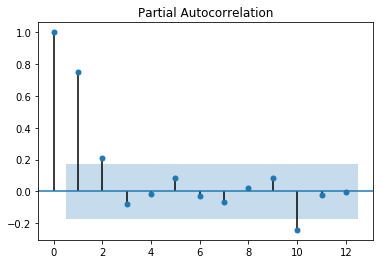

In [34]:
plot_pacf(dataset['Seasonal Difference'].dropna(), lags=12)

In [ ]:
# d = 2
# D = 1
# q = 2
# p = 0-2
# Q = 5
# P = 2

# Note - here you need expert advice while doing real time case study
# expert - who is stats / who is already performing TSA
# please take consent for the values what would be the right thing

In [67]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [92]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order =(2,2,2), seasonal_order=(2,1,1,12))

In [93]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -498.100
Date:                              Sat, 27 Feb 2021   AIC                           1012.201
Time:                                      19:18:27   BIC                           1035.141
Sample:                                           0   HQIC                          1021.522
                                              - 144                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3475      0.092    -14.662      0.000      -1.528      -1.167
ar.L2         -0.42

In [39]:
len(dataset)

144

In [41]:
dataset.head()

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


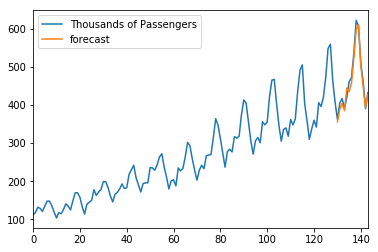

In [94]:
dataset['forecast']= results.predict(start=130, end=144, dynamic = True)
dataset[['Thousands of Passengers', 'forecast']].plot()

In [ ]:
# Basic package requried to install in your notebook
from numpy import log
from pandas import Series
from statsmodels.tsa.stattools import adfuller ## this is for stationary dataset
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA # this is the main package or model we have 
from statsmodels.tsa.stattools import acf, pacf

In [95]:
from pandas import Series

In [96]:
from pandas.tseries.offsets import DateOffset

In [102]:
#future_dates = [dataset.index[-1]+ DateOffset(months=x) for x in range(0,48)]
future_dates = [dataset.index[-1]+ DateOffset(months=x) for x in range(0,48)]

TypeError: unsupported operand type(s) for +: 'int' and 'relativedelta'

In [54]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [55]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [56]:
future_df = pd.concat([dataset,future_dates_df ])

In [57]:
future_df

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN
1949-10-01,119,-17.0,-5.0,NaN,NaN


C:\Users\Kumar Sundram\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


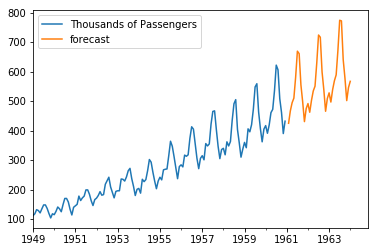

In [58]:
future_df['forecast'] = results.predict(start=145, end =180, dynamic = True)
future_df[['Thousands of Passengers','forecast']].plot()

# The End